In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

#perceptron class 선언
class Perceptron:
    #초기조건 : input,hiddin,output 차원 및 learning rate 등 설정. 특히, w1,w2는 정규분포상에서 랜덤추출한다.
    def __init__(self, input_dim, hidden_dim, output_dim, Ir):
        self.w1 = np.random.normal(0.0, pow(hidden_dim, -0.5), (input_dim, hidden_dim))
        self.w2 = np.random.normal(0.0, pow(hidden_dim, -0.5), (hidden_dim,output_dim))
        self.h = np.zeros((1,hidden_dim)) #처음에 0으로 둔다. hidden layer.
        self.lr = lr
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.theta = 0
    #sigmoid함수 정의
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
    #x를 y로 보내는 함수
    def feedforward(self, x):
        a = x.astype(float) #float로 저장
        b = self.w1.astype(float)
        self.h = self.sigmoid(np.dot(a,b)-self.theta)
        return self.sigmoid(np.dot(self.h, self.w2)-self.theta)
    #x를 h로 보내는 함수
    def feedforward_upto_hidden(self, x):
        return self.sigmoid(np.dot(x, self.w1)-self.theta)
    #w2에 대한 back propagation. 
    def bprop_w2(self, g, y): #g,y는 vector
        q = (-2)*(g-y)*y*(1-y)
        return np.dot(self.h.reshape(self.hidden_dim,1),q.reshape(1,self.output_dim))
    #w1에 대한 back propagation.    
    def bprop_w1(self, g, y,x): #g,y는 vector
        q1 = (-2)*(g-y)*y*(1-y)
        q2 = np.dot(self.w2, q1)
        return np.dot(x.reshape(self.input_dim,1),q2*self.h*(1-self.h).reshape(1,self.hidden_dim))
    #target을 지정해서 input과의 비교하며 훈련
    def training(self, input, target):
        x = np.array(input).T
        y = self.feedforward(x)
        g = np.array(target).T
        self.w1 = self.w1 - self.lr*self.bprop_w1(g,y,x) #bprop_w1에 w2가 사용되므로, w1을 먼저!
        self.w2 = self.w2 - self.lr*self.bprop_w2(g,y)

In [ ]:
#Perceptron의 init 설정
input_dim = 4
hidden_dim = 2000
output_dim = 10
lr=0.1
epoch = 10
pct = Perceptron(input_dim,hidden_dim,output_dim,lr)

In [ ]:
#파일 불러오기
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
training_dataset_file = open("/content/gdrive/My Drive/line1_preprocessed by index.csv",'r',encoding='utf-8-sig')

training_dataset_list = training_dataset_file.readlines()
training_dataset_file.close()
input_list = list()

In [ ]:
index = 2
(float)(training_dataset_list[index].split(',')[0])
#training_dataset_list

1.0

In [ ]:
from google.colab import output

for k in range(epoch):
    #learning rate decreasing
    pct.lr = pct.lr *0.8
    counter = 0
    for i in training_dataset_list:
        all_values = i.split(',')

        month = (int)(all_values[0])
        day = (int)(all_values[1])
        station_num = (int)(all_values[2])
        for j in range(1,21):
            inputs = np.asfarray([month, day, station_num, 0.5*j])
            targets = np.zeros(output_dim) + 0.01
            targets[int(all_values[j+2])-1] = 0.99
            pct.training(inputs, targets)
        if(counter%1000==0):
            output.clear()
            print(counter, "of", len(training_dataset_list), "for epoch", k)
        counter = counter+ 1

40000 of 40180 for epoch 9


In [ ]:
#학습한 가중치 저장
from google.colab import files
import pandas as pd
import numpy

w1_file = numpy.asarray(pct.w1)
pd.DataFrame(w1_file).to_csv("weight1.csv", header=None, index=None)
w2_file = numpy.asarray(pct.w2)
pd.DataFrame(w2_file).to_csv("weight2.csv", header=None, index=None)

files.download('weight1.csv')
files.download('weight2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#학습한 가중치 불러오기
from google.colab import files
uploaded = files.upload()

Saving weight1.csv to weight1.csv
Saving weight2.csv to weight2.csv


In [ ]:
dataset_file = open("weight1.csv",'r',encoding='utf-8-sig')
w1_load = dataset_file.readlines()
dataset_file.close()
dataset_file = open("weight2.csv",'r',encoding='utf-8-sig')
w2_load = dataset_file.readlines()
dataset_file.close()

In [ ]:
for i in range(input_dim):
    for j in range(hidden_dim):
        pct.w1[i][j] = (float)(w1_load[i].split(',')[j])
for i in range(hidden_dim):
    for j in range(output_dim):
        pct.w2[i][j] = (float)(w2_load[i].split(',')[j])

In [ ]:
pct.w1

array([[ 0.53247183,  0.08069548,  0.03487169, ...,  0.04175535,
         0.01850182,  0.03840401],
       [-1.42391146, -0.22051869, -0.16979814, ..., -0.05528614,
        -0.11654806, -0.18222274],
       [-6.85807606, -0.23014852, -0.60224402, ..., -0.27966742,
        -0.24981381, -0.22769073],
       [-0.04787323, -0.30674467, -0.13416706, ..., -0.29948071,
        -0.27346129, -0.27537288]])

In [ ]:
#print(training_dataset_list[2].split(',')[5])
#single data predict

test_month   = 1     #월 
test_day     = 5     #평 - 3, 토 - 5, 일 - 7
test_station = 1     #서울역(1) – 시청(2) – 종각(3) – 종로3가(4) – 종로5가(5) – 동대문(6)– 동묘앞(7) – 신설동(8) – 제기동(9) - 청량리(10)
test_time    = 16    #시간     

test_result = pct.feedforward(np.asfarray([test_month, test_day, test_station, (float)(test_time/2) - 2]))
for i in range(10):
    print("possiblity of level",i+1, "is", round(test_result[i],4))

possiblity of level 1 is 0.0
possiblity of level 2 is 0.0
possiblity of level 3 is 0.0
possiblity of level 4 is 0.0
possiblity of level 5 is 0.0
possiblity of level 6 is 0.0005
possiblity of level 7 is 0.1083
possiblity of level 8 is 0.304
possiblity of level 9 is 0.0061
possiblity of level 10 is 0.0


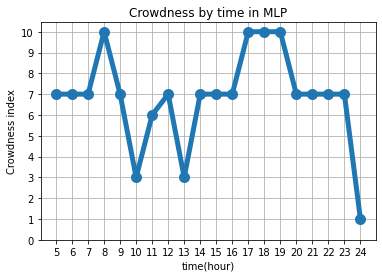

In [ ]:
#prediction by time
import matplotlib as mpl
import matplotlib.pylab as plt

test_month   = 6     #월 
test_day     = 3     #평 - 3, 토 - 5, 일 - 7
test_station = 1     #서울역(1) – 시청(2) – 종각(3) – 종로3가(4) – 종로5가(5) – 동대문(6)– 동묘앞(7) – 신설동(8) – 제기동(9) - 청량리(10)

index_by_time = list()

for i in range(5,25):
     test_result = pct.feedforward(np.asfarray([test_month, test_day, test_station, ((float)(i)/2) - 2]))
     Crowdness_prediction = np.argmax(test_result)+1
     index_by_time.append(Crowdness_prediction)

plt.title("Crowdness by time in MLP")
plt.plot(range(5,25), index_by_time, lw=5, marker="o",  mew=5, mfc="r")
plt.grid()
plt.xticks(range(5,25))
plt.yticks(range(0,11))
plt.xlabel("time(hour)")
plt.ylabel("Crowdness index")
plt.show()

In [ ]:
#test data
test_dataset_file = open("/content/gdrive/My Drive/line1_preprocessed by index_test.csv",'r',encoding='utf-8-sig')

test_dataset_list = test_dataset_file.readlines()
test_dataset_file.close()

In [ ]:
#error rate
success = 0
near_success = 0
failure = 0
target_predict_distance = list()

error_list = list()

for i in test_dataset_list:
    #테스트 데이터 가공. target은 각 행의 1열
    all_values = i.split(',')
    error_time_num = 0

    for time in range(5,25):
        prediction_list = pct.feedforward(np.asfarray([(int)(all_values[0]),(int)(all_values[1]),(int)(all_values[2]),((float)(time)/2) - 2]))
        prediction = np.argmax(prediction_list)+1

        #예측이 맞으면 성공, 틀리면 실패
        if (int)(all_values[time-2]) == prediction:
            success += 1
        elif abs((int)(all_values[time-2]) - prediction) == 1:
            near_success += 1
        else :
            failure += 1
            error_time_num += 1
        
        target_predict_distance.append(abs((int)(all_values[time-2]) - prediction))

        if (error_time_num > 15) :
            error_list.append(all_values)


#Error rate와 Error 자료의 수를 표시
print("MLP error rate")
print("success rate = ", (success+near_success)/(success+near_success+failure))
print("failure rate = ", (failure/(success+near_success+failure)))
print("Critically success rate=", success/(success+near_success+failure))
print("nearly success rate=", near_success/(success+near_success+failure))
print("Total ", failure,"Error cases")

MLP error rate
success rate =  0.7487397260273972
failure rate =  0.25126027397260275
Critically success rate= 0.4629041095890411
nearly success rate= 0.28583561643835614
Total  18342 Error cases


In [ ]:
len(error_list)

62

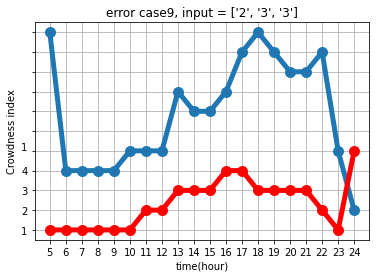

In [ ]:
#error case analysis
import matplotlib as mpl
import matplotlib.pylab as plt

error_list_index = 9

test_month   = error_list[error_list_index][0]     #월 
test_day     = error_list[error_list_index][1]     #평 - 3, 토 - 5, 일 - 7
test_station = error_list[error_list_index][2]     #서울역(1) – 시청(2) – 종각(3) – 종로3가(4) – 종로5가(5) – 동대문(6)– 동묘앞(7) – 신설동(8) – 제기동(9) - 청량리(10)

index_by_time = list()
index_by_time_test = list()

for i in range(5,25):
     test_result = pct.feedforward(np.asfarray([test_month, test_day, test_station, ((float)(i)/2) - 2]))
     Crowdness_prediction = np.argmax(test_result)+1
     index_by_time.append(Crowdness_prediction)
     index_by_time_test.append(error_list[error_list_index][i-2])

title = "error case" + (str)(error_list_index) + ", input = " + (str)(error_list[error_list_index][0:3])
plt.title(title)
plt.plot(range(5,25), index_by_time, lw=5, marker="o",  mew=5, mfc="r")
plt.plot(range(5,25), index_by_time_test, lw=5, marker="o",  mew=5, mfc="r", color = "red")
plt.grid()
plt.xticks(range(5,25))
plt.yticks(range(0,11))
plt.xlabel("time(hour)")
plt.ylabel("Crowdness index")

plt.show()

In [ ]:
#prediction과 target사이의 차이
dist = np.zeros(10)
for j in range(10):
    for i in target_predict_distance:
        if (i == j):
            dist[j] += 1

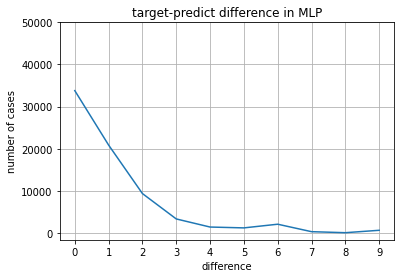

In [ ]:
import matplotlib as mpl
import matplotlib.pylab as plt

plt.title("target-predict difference in MLP")
plt.plot(range(10),dist)
plt.yticks([0,10000,20000,30000,40000,50000])
plt.xticks(range(10))
plt.grid()
plt.xlabel("difference")
plt.ylabel("number of cases")
plt.show()

In [ ]:
np.sum(dist[0:3])/np.sum(dist)

0.8768219178082192